**PREDICTING DIRECTION OF NEXT DAY STOCK PRICE MOVEMENT USING RANDOM FOREST**


In [10]:
%pip install scikit-learn


  Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl.metadata (12 kB)
  Using cached scipy-1.14.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl (10.9 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.0-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
%pip install pandas_ta


     ---------------------------------------- 0.0/115.1 kB ? eta -:--:--
     ---------------- -------------------- 51.2/115.1 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 115.1/115.1 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218927 sha256=81506d87467b0e49fcc01f689108b6f4462530d0910b5fd6d0d56bdb8cbf3dca
  Stored in directory: c:\users\maadurga computer\appdata\local\pip\cache\wheels\fd\ed\18\2a12fd1b7906c63efca6accb351929f2c7f6bbc674e1c0ba5d
Successfully built pandas_ta



[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import yfinance as yf
import pandas as pd
import os
import pandas_ta as ta
import numpy as np

In [5]:
def data(ticker):
  df = yf.Ticker(ticker)
  df = df.history(period="max")
  df.index = pd.to_datetime(df.index)
  del df["Dividends"]
  del df["Stock Splits"]
  df = df.loc["2014-01-01":].copy()
  df["Target"] = (df["Close"] > df["Open"]).astype(int).shift(-1)   ##Binary target...tomorrow increase or decrease direction as an output to be decided by todays statistics
  # frequency = df['Target'].value_counts()
  # print(frequency)
  df.dropna(inplace=True)
  return df

In [6]:
nifty=data("^NSEI")

In [7]:
nifty

,Open,High,Low,Close,Volume,Target
Date,,,,,,
2014-01-02 00:00:00+05:30,6301.250000,6358.299805,6211.299805,6221.149902,158100,1.0
2014-01-03 00:00:00+05:30,6194.549805,6221.700195,6171.250000,6211.149902,139000,0.0
2014-01-06 00:00:00+05:30,6220.850098,6224.700195,6170.250000,6191.450195,118300,0.0
2014-01-07 00:00:00+05:30,6203.899902,6221.500000,6144.750000,6162.250000,138600,0.0
2014-01-08 00:00:00+05:30,6178.049805,6192.100098,6160.350098,6174.600098,146900,0.0
...,...,...,...,...,...,...
2024-07-16 00:00:00+05:30,24615.900391,24661.250000,24587.650391,24613.000000,283200,1.0
2024-07-18 00:00:00+05:30,24543.800781,24837.750000,24504.449219,24800.849609,350900,0.0
2024-07-19 00:00:00+05:30,24853.800781,24854.800781,24508.150391,24530.900391,343800,1.0


<Axes: xlabel='Date'>

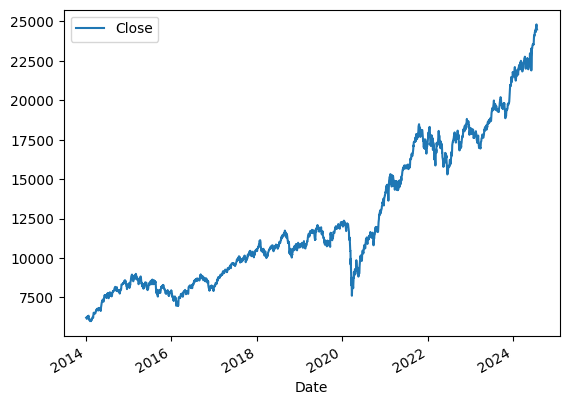

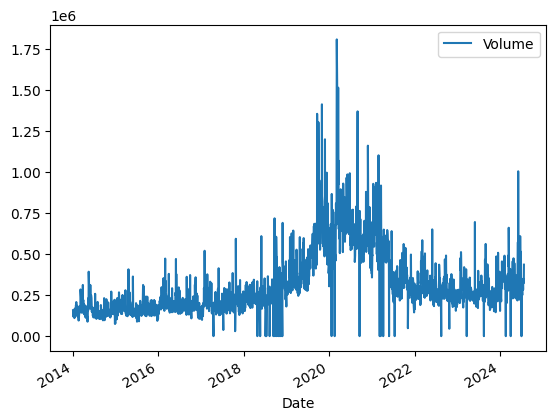

In [8]:
nifty.plot.line(y="Close", use_index=True)
nifty.plot.line(y="Volume", use_index=True)

**First we are going to make a simple model with less features using random forest classifier of sklearn module**(which will predict whether the stock price will go up(1) or down(0) tomorrow) :

In [34]:
nifty=data("^NSEI")
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, min_samples_split=10, random_state=50,n_jobs=-1)
train= nifty.iloc[-400:-30]
test = nifty.iloc[-30:-1]
features = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[features], train["Target"])
print(model.feature_importances_)
print("Training score",model.score(train[features], train["Target"]))

[0.19444959 0.2413532  0.18995586 0.1773482  0.19689315]
Training score 0.9459459459459459


Following are the results of the predictions of the model whether stock price will increase or decrease tomorrow using only "Close", "Volume", "Open", "High", "Low" prices of today :


In [35]:
from sklearn.metrics import accuracy_score

prediction = model.predict(test[features])
prediction = pd.Series(prediction, index=test.index)
print("Accuracy Score",accuracy_score(test["Target"], prediction))

Accuracy Score 0.6206896551724138


**For the following model, various indicators will be used (using pandas_ta) :**

In [37]:
# Calculating technical indicators using pandas_ta
nifty=data("^NSEI")
nifty['SMA_5'] = ta.sma(nifty['Close'], length=5)
nifty['EMA_5'] = ta.ema(nifty['Close'], length=5)
nifty['RSI_14'] = ta.rsi(nifty['Close'], length=14)
macd = ta.macd(nifty['Close'])
# nifty['MACD'] = macd['MACD_12_26_9']
nifty['MACD_signal'] = macd['MACDs_12_26_9']
# nifty['MACD_hist'] = macd['MACDh_12_26_9']
nifty['ATR'] = ta.atr(nifty['High'], nifty['Low'], nifty['Close'], length=14)
nifty['OBV'] = ta.obv(nifty['Close'], nifty['Volume'])
bbands = ta.bbands(nifty['Close'], length=20)
# nifty['Upper_BB'] = bbands['BBU_20_2.0']
# nifty['Middle_BB'] = bbands['BBM_20_2.0']
# nifty['Lower_BB'] = bbands['BBL_20_2.0']

# Lagged features (kind of last five rows to predict the next row)
for lag in range(1, 10):  # Example: 1 to 5 days lag
    # lag-=1
    nifty[f'Close_t-{lag}'] = nifty['Close'].shift(lag)
    nifty[f'Open_t-{lag}'] = nifty['Open'].shift(lag)
    nifty[f'High_t-{lag}'] = nifty['High'].shift(lag)
    nifty[f'Low_t-{lag}'] = nifty['Low'].shift(lag)
    nifty[f'Volume_t-{lag}'] = nifty['Volume'].shift(lag)

# NaN values will be obviously generated by shifting
nifty = nifty.dropna()

nifty

,Open,High,Low,Close,Volume,Target,SMA_5,EMA_5,RSI_14,MACD_signal,...,Close_t-8,Open_t-8,High_t-8,Low_t-8,Volume_t-8,Close_t-9,Open_t-9,High_t-9,Low_t-9,Volume_t-9
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-19 00:00:00+05:30,6132.049805,6160.350098,6125.750000,6152.750000,95200,0.0,6082.660059,6099.157225,53.324903,-72.714650,...,6036.299805,6028.350098,6048.350098,5965.399902,185500.0,6022.399902,6004.250000,6028.049805,5962.049805,166600.0
2014-02-20 00:00:00+05:30,6127.149902,6129.100098,6086.450195,6091.450195,132100,1.0,6084.150098,6096.588215,46.788779,-67.229312,...,6063.200195,6077.649902,6079.950195,6030.899902,181900.0,6036.299805,6028.350098,6048.350098,5965.399902,185500.0
2014-02-21 00:00:00+05:30,6108.299805,6159.649902,6108.000000,6155.450195,112600,1.0,6115.020117,6116.208875,53.233846,-61.111082,...,6053.450195,6072.799805,6083.049805,6046.399902,133100.0,6063.200195,6077.649902,6079.950195,6030.899902,181900.0
2014-02-24 00:00:00+05:30,6140.950195,6191.850098,6130.799805,6186.100098,144900,0.0,6142.570117,6139.505949,55.983473,-54.288609,...,6062.700195,6072.450195,6081.850098,6053.250000,150500.0,6053.450195,6072.799805,6083.049805,6046.399902,133100.0
2014-02-25 00:00:00+05:30,6205.700195,6216.850098,6176.600098,6200.049805,146300,1.0,6157.160059,6159.687234,57.216407,-47.036081,...,6084.000000,6085.350098,6106.600098,6077.399902,138500.0,6062.700195,6072.450195,6081.850098,6053.250000,150500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-16 00:00:00+05:30,24615.900391,24661.250000,24587.650391,24613.000000,283200,1.0,24468.449609,24503.048870,74.377006,365.382320,...,24302.150391,24369.949219,24401.000000,24281.000000,251200.0,24286.500000,24291.750000,24309.150391,24207.099609,0.0
2024-07-18 00:00:00+05:30,24543.800781,24837.750000,24504.449219,24800.849609,350900,0.0,24563.729687,24602.315783,77.411690,368.029501,...,24323.849609,24213.349609,24363.000000,24168.849609,298400.0,24302.150391,24369.949219,24401.000000,24281.000000,251200.0
2024-07-19 00:00:00+05:30,24853.800781,24854.800781,24508.150391,24530.900391,343800,1.0,24606.719922,24578.510652,65.420695,366.687679,...,24320.550781,24329.449219,24344.599609,24240.550781,266300.0,24323.849609,24213.349609,24363.000000,24168.849609,298400.0


Lets firstly define all of these things features...later we will find which ones are more important(or all of them are :)


In [15]:
# Define features and target variable
featuresl = [
    'Close_t-1', 'Close_t-2', 'Close_t-3', 'Close_t-4', 'Close_t-5',
    'Open_t-1', 'High_t-1', 'Low_t-1', 'Volume_t-1',
    'SMA_10', 'EMA_10', 'RSI_14', 'MACD', 'MACD_signal', 'MACD_hist',
    'ATR', 'OBV', 'Upper_BB', 'Middle_BB', 'Lower_BB',
]
featuresq =['SMA_10', 'EMA_10', 'RSI_14', 'MACD', 'MACD_signal', 'MACD_hist',
    'ATR', 'OBV', 'Upper_BB', 'Middle_BB', 'Lower_BB','Open','High','Low','Close','Volume']  ##without lagged features
features =['SMA_10', 'EMA_10', 'RSI_14', 'MACD', 'MACD_signal','Middle_BB','Open','Close','Volume']  ##without lagged features
X = nifty[featuresq]
y = nifty['Target']  # Binary target: 0 for price decrease, 1 for price increase

Lets now build the model, using same parameters(later will tune them too) :

In [21]:
# Train-test split while maintaining the temporal order
train_size = int(len(X) * 0.95)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
model = RandomForestClassifier(n_estimators=385, min_samples_split=17, random_state=6,min_samples_leaf=1,max_features=10,n_jobs=-1)
model.fit(X_train, y_train)
print(model.feature_importances_)
#Training set results
prediction = model.predict(X_train)
prediction = pd.Series(prediction, index=X_train.index)
df=pd.concat([y_train, prediction], axis=1)
# display(df)
print("Accuracy Score",accuracy_score(y_train, prediction))

[0.037131   0.02956049 0.10479848 0.08116557 0.08346858 0.1020043
 0.09601679 0.07138055 0.04548585 0.03519535 0.05106729 0.04014034
 0.03298451 0.03268549 0.03928704 0.11762837]
Accuracy Score 0.9678217821782178


In [22]:
#Testing set results
prediction = model.predict(X_test)
prediction = pd.Series(prediction, index=X_test.index)
df=pd.concat([y_test, prediction], axis=1)
# display(df)
print("Accuracy Score",accuracy_score(y_test, prediction))

Accuracy Score 0.5


Now parameter tuning:


In [26]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Define lagged features and technical indicators
lagged_features = [f'Close_t-{i}' for i in range(1, 6)] + [f'Open_t-{i}' for i in range(1, 6)] + [f'Volume_t-{i}' for i in range(1, 6)]
featuresq = ['SMA_10', 'EMA_10', 'RSI_14', 'MACD', 'MACD_signal', 'MACD_hist',      
    'ATR', 'OBV', 'Upper_BB', 'Middle_BB', 'Lower_BB', 'Open', 'High', 'Low', 'Close', 'Volume']

# Combine all features
all_features = featuresq + lagged_features

# Feature normalization
scaler = StandardScaler()
nifty[all_features] = scaler.fit_transform(nifty[all_features])

# Prepare your features and target
X = nifty[all_features]
y = nifty['Target']  # replace with your actual target column

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Perform RFE
rfe = RFE(estimator=rf, n_features_to_select=12)  # Adjust 'n_features_to_select' as needed
rfe.fit(X, y)

# Get the selected features
selected_features = [feature for feature, selected in zip(all_features, rfe.support_) if selected]
print(f'Selected Features: {selected_features}')

# Use only the selected features
X_selected = nifty[selected_features]

Selected Features: ['RSI_14', 'MACD_signal', 'MACD_hist', 'ATR', 'OBV', 'Volume', 'Close_t-2', 'Volume_t-1', 'Volume_t-2', 'Volume_t-3', 'Volume_t-4', 'Volume_t-5']


In [62]:
# Time Series Split
tscv = TimeSeriesSplit(n_splits=5)
acc=[]
for train_index, test_index in tscv.split(X_selected):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', min_samples_split=10, min_samples_leaf=2,  random_state=42,n_jobs=-1)
    # Get probabilities on training set
    model.fit(X_train,y_train)
#     y_proba_train = model.predict_proba(X_train)

#     # Set custom threshold
#     threshold = 0.7
#     y_pred_train = (y_proba_train[:, 1] > threshold).astype(int)

#     # Fit the model with adjusted predictions
#     model.fit(X_train, y_pred_train)
    
    # Predict probabilities
    y_proba = model.predict_proba(X_test)

    # Set custom threshold
    threshold = 0.55
    y_pred = (y_proba[:, 1] > threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    print(f'Test Accuracy: {accuracy}')
mean_Acc=np.mean(acc)
print(f'Mean accuracy: {mean_Acc}')

Test Accuracy: 0.56
Test Accuracy: 0.5294117647058824
Test Accuracy: 0.5129411764705882
Test Accuracy: 0.52
Test Accuracy: 0.5247058823529411
Mean accuracy: 0.5294117647058822


In [32]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [50,100, 200, 300],
    'max_depth': [6,10, 20],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=tscv, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_selected, y)
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(nifty, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = nifty.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    nifty[ratio_column] = nifty["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    nifty[trend_column] = nifty.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [ ]:
nifty = nifty.dropna(subset=nifty.columns[nifty.columns != "Tomorrow"])

In [ ]:
nifty

In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
predictions = backtest(nifty, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

In [ ]:
predictions